<a href="https://colab.research.google.com/github/takashinnosuke/study_Keras/blob/main/News_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
  reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


ニュースサンプルをテキストに変換する

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = \
  dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

データのエンコーディング

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [27]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [28]:
#モデルの構築
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#検証データセットの設定
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
#モデルの訓練
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 2.8037 - accuracy: 0.4931 - val_loss: 1.8934 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 61ms/step - loss: 1.5540 - accuracy: 0.6854 - val_loss: 1.3637 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 62ms/step - loss: 1.1309 - accuracy: 0.7536 - val_loss: 1.1951 - val_accuracy: 0.7170
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8861 - accuracy: 0.8051 - val_loss: 1.0510 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7045 - accuracy: 0.8495 - val_loss: 0.9625 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5646 - accuracy: 0.8830 - val_loss: 0.9243 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4538 - accuracy: 0.9073 - val_loss: 0.8896 - val_accuracy: 0.8090
Epoch 8/20
16

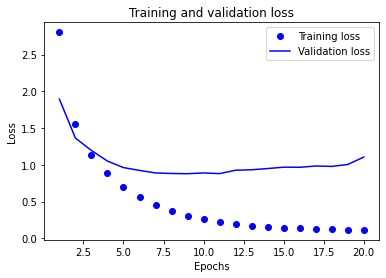

In [32]:
#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

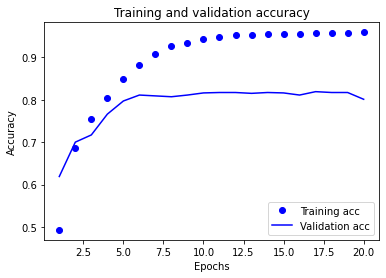

In [33]:
#訓練データと検証データでの正解率をプロット
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
#モデルの訓練をやり直す
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 70ms/step - loss: 2.5771 - accuracy: 0.4496 - val_loss: 1.7560 - val_accuracy: 0.6290
Epoch 2/8
16/16 [==============================] - 1s 60ms/step - loss: 1.4446 - accuracy: 0.6969 - val_loss: 1.3179 - val_accuracy: 0.6960
Epoch 3/8
16/16 [==============================] - 1s 50ms/step - loss: 1.0810 - accuracy: 0.7663 - val_loss: 1.1444 - val_accuracy: 0.7430
Epoch 4/8
16/16 [==============================] - 1s 55ms/step - loss: 0.8551 - accuracy: 0.8145 - val_loss: 1.0336 - val_accuracy: 0.7780
Epoch 5/8
16/16 [==============================] - 1s 60ms/step - loss: 0.6871 - accuracy: 0.8518 - val_loss: 0.9769 - val_accuracy: 0.7890
Epoch 6/8
16/16 [==============================] - 1s 64ms/step - loss: 0.5476 - accuracy: 0.8829 - val_loss: 0.9367 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 1s 62ms/step - loss: 0.4427 - accuracy: 0.9093 - val_loss: 0.9003 - val_accuracy: 0.8120
Epoch 8/8
71/71 [===

In [37]:
#新しいデータの予測値を生成
predictions = model.predict(x_test)
predictions[0].shape

(46,)